In [ ]:
pip install mlxtend

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

C:\Users\moham\AppData\Local\Temp\ipykernel_28568\2473352509.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
start_all=time.time()

In [2]:
s=time.time()
dataset=pd.read_csv('full_data.csv')
e=time.time()
sf_time= e-s
sf_time

165.72946166992188

In [3]:
dataset

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686574,234740,0.000000,54.00,6.00,64.00,25.224003,25.224003,0.0,0.0,0.0,...,0.000000,54.00,8.307636e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
46686575,234741,0.000000,0.00,1.00,64.00,0.469918,0.469918,0.0,0.0,0.0,...,0.000000,42.00,8.312488e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
46686576,234742,4.274490,107.85,6.00,64.00,0.463217,0.463217,0.0,0.0,0.0,...,0.172084,54.39,8.294658e+07,9.5,10.396218,0.246316,1.516787,0.02,141.55,DoS-TCP_Flood
46686577,234743,0.130775,44335.00,17.00,64.00,6981.093452,6981.093452,0.0,0.0,0.0,...,0.000000,50.00,8.309869e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [4]:
dataset=dataset.drop(['Unnamed: 0'],axis=1)

In [5]:
dataset= dataset.sample(frac = 1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46686579 entries, 20795649 to 13156688
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP     

copy_dataset_original_dataset

In [7]:
original_dataset = dataset.copy()

##split target to 8 class


In [4]:
DoS=['DoS-TCP_Flood','DoS-UDP_Flood','DoS-SYN_Flood','DoS-HTTP_Flood']
DDoS=['DDoS-RSTFINFlood','DDoS-ICMP_Flood','DDoS-SynonymousIP_Flood','DDoS-SYN_Flood','DDoS-PSHACK_Flood','DDoS-TCP_Flood','DDoS-UDP_Flood','DDoS-ACK_Fragmentation','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-SlowLoris','DDoS-HTTP_Flood']
BruteForce=['DictionaryBruteForce']
Spoofing=['DNS_Spoofing','MITM-ArpSpoofing']
Reconnaissance=['Recon-PingSweep','Recon-PortScan','Recon-OSScan','Recon-HostDiscovery','VulnerabilityScan']
Web_based=['SqlInjection','CommandInjection','Backdoor_Malware','Uploading_Attack','XSS','BrowserHijacking']
Mirai=['Mirai-greeth_flood','Mirai-udpplain','Mirai-greip_flood']

Class_target=['DoS','DDoS','BruteForce','Spoofing','Reconnaissance','Web-based','Mirai','BenignTraffic']

In [5]:
def map_attack(attack):
    if attack in DoS:
        # dos_attacks map to 1
        attack_type = 'DoS'
    elif attack in DDoS:
        # probe_attacks mapt to 2
        attack_type = 'DDoS'
    elif attack in BruteForce:
        # privilege escalation attacks map to 3
        attack_type = 'BruteForce'
    elif attack in Spoofing:
        # remote access attacks map to 4
        attack_type = 'Spoofing'
    elif attack in Reconnaissance:
        # remote access attacks map to 5
        attack_type = 'Reconnaissance'
    elif attack in Web_based:
        # remote access attacks map to 6
        attack_type = 'Web_based'
    elif attack in Mirai:
        # remote access attacks map to 7
        attack_type = 'Mirai'
    else:
        # normal maps to 0
        attack_type = "BenignTraffic"

    return attack_type

In [6]:
# map the data and join to the data set
attack_map = dataset.label.apply(map_attack)
dataset['class_label'] = attack_map

In [ ]:
dataset


In [7]:
dataset.class_label

0           DDoS
1            DoS
2           DDoS
3            DoS
4            DoS
            ... 
46686574    DDoS
46686575    DDoS
46686576     DoS
46686577    DDoS
46686578    DDoS
Name: class_label, Length: 46686579, dtype: object

In [8]:
dataset['class_label'].sort_values

<bound method Series.sort_values of 0           DDoS
1            DoS
2           DDoS
3            DoS
4            DoS
            ... 
46686574    DDoS
46686575    DDoS
46686576     DoS
46686577    DDoS
46686578    DDoS
Name: class_label, Length: 46686579, dtype: object>

In [9]:
label_list=dataset.get('class_label').tolist()
ddos=label_list.count('DDoS')
dos=label_list.count('DoS')
Reconnaissance=label_list.count('Reconnaissance')
miria=label_list.count('Mirai')
Web_based=label_list.count('Web_based')
BruteForce=label_list.count('BruteForce')
Spoofing=label_list.count('Spoofing')
normal=label_list.count('BenignTraffic')
print(ddos,dos,Reconnaissance,normal,Spoofing,BruteForce,Web_based,miria)



#DDos_count=list_one.count('DDos')

33984560 8090738 354565 1098195 486504 13064 24829 2634124


In [14]:
#dt.to_csv('C:/Users/abc/Desktop/file_name.csv')
dataset.to_csv('G:\dataset_ciciot_LOWSAMPLE.csv')

C:\Users\moham\AppData\Local\Temp\ipykernel_28568\2376274274.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_label',


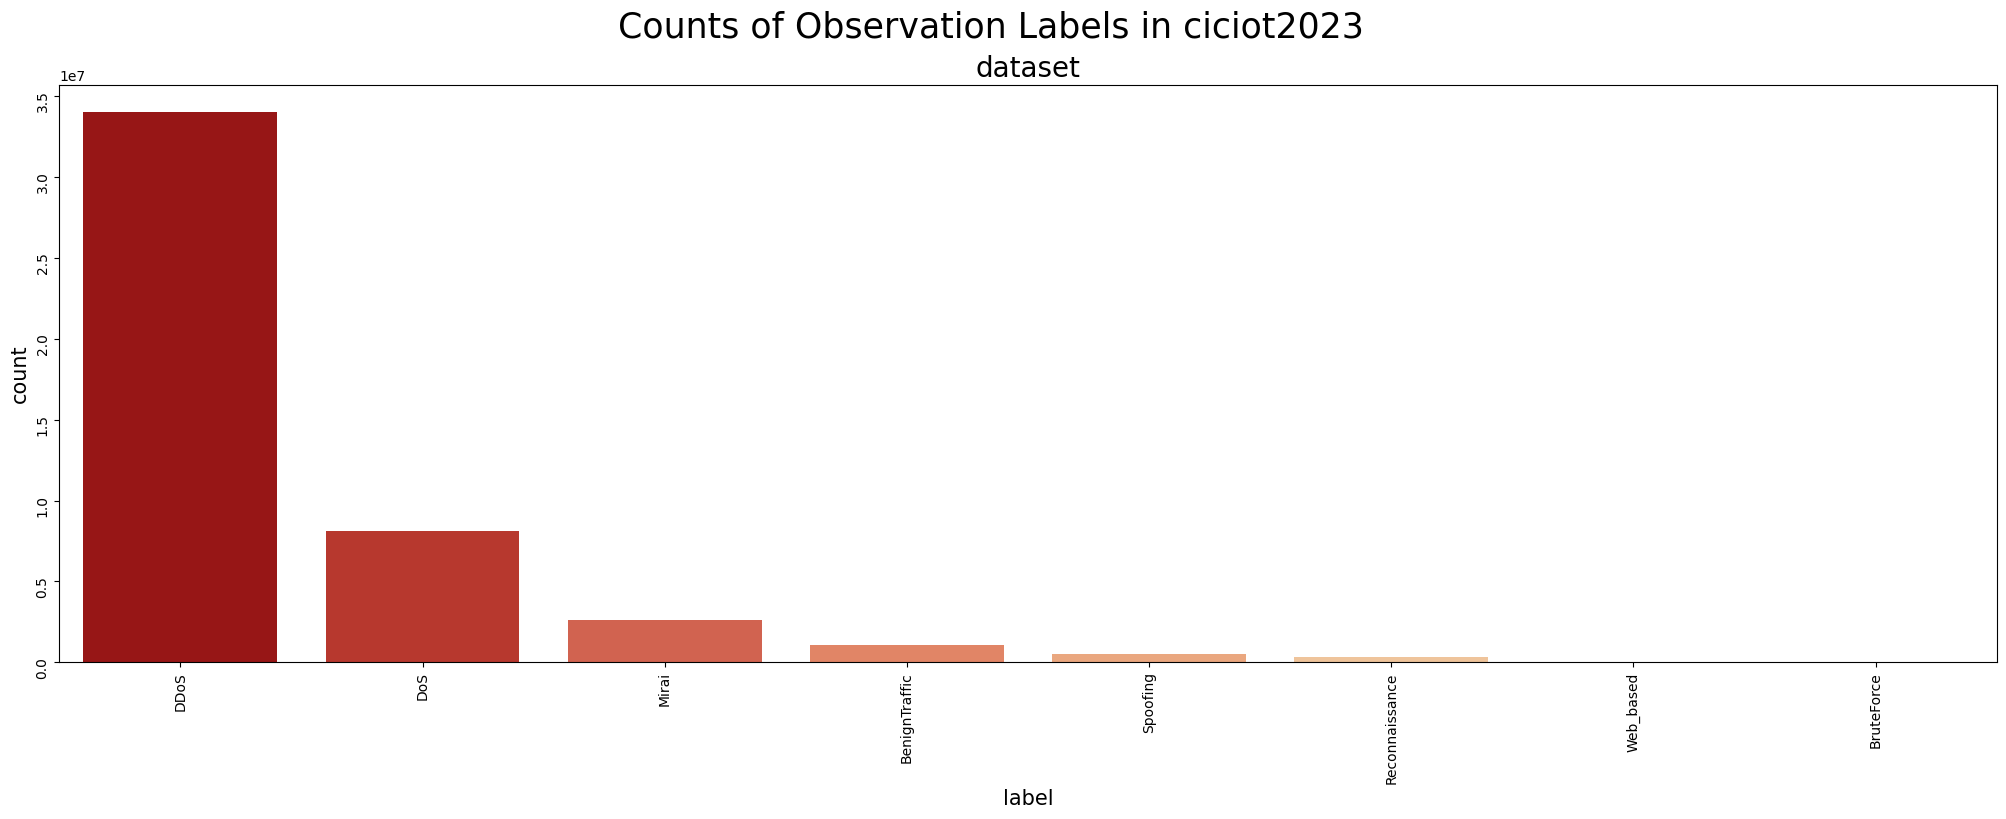

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


fig,(ax)= plt.subplots(ncols=1, figsize=(25, 7.5), dpi=100)

fig.suptitle(f'Counts of Observation Labels in ciciot2023 ', fontsize=25)

sns.countplot(x='class_label',
            palette="OrRd_r",
            data=dataset,
            order=dataset['class_label'].value_counts().index,
            ax=ax)

ax.set_title('dataset', fontsize=20)
ax.set_xlabel('label', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.tick_params(labelrotation=90)

plt.show()

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686579 entries, 0 to 46686578
Data columns (total 49 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   flow_duration    float64
 2   Header_Length    float64
 3   Protocol Type    float64
 4   Duration         float64
 5   Rate             float64
 6   Srate            float64
 7   Drate            float64
 8   fin_flag_number  float64
 9   syn_flag_number  float64
 10  rst_flag_number  float64
 11  psh_flag_number  float64
 12  ack_flag_number  float64
 13  ece_flag_number  float64
 14  cwr_flag_number  float64
 15  ack_count        float64
 16  syn_count        float64
 17  fin_count        float64
 18  urg_count        float64
 19  rst_count        float64
 20  HTTP             float64
 21  HTTPS            float64
 22  DNS              float64
 23  Telnet           float64
 24  SMTP             float64
 25  SSH              float64
 26  IRC              float64
 27  TCP       

In [18]:
dataset.isnull().sum()


Unnamed: 0         0
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label        

In [19]:
dataset.nunique()

Unnamed: 0           451498
flow_duration      19377786
Header_Length       3908880
Protocol Type          9358
Duration              24047
Rate               23810821
Srate              23810821
Drate                  2941
fin_flag_number           2
syn_flag_number           2
rst_flag_number           2
psh_flag_number           2
ack_flag_number           2
ece_flag_number           2
cwr_flag_number           2
ack_count              1048
syn_count              3780
fin_count              2000
urg_count             51822
rst_count            113649
HTTP                      2
HTTPS                     2
DNS                       2
Telnet                    2
SMTP                      2
SSH                       2
IRC                       2
TCP                       2
UDP                       2
DHCP                      2
ARP                       2
ICMP                      2
IPv                       2
LLC                       2
Tot sum              784638
Min                 